# Pandas

* [Pandas](https://pandas.pydata.org/) es un paquete de Python que implementa ciertos tipos de datos, construidos sobre `numpy`
* Los tipos básicos de Pandas son:
    * Series: 1 dimensión
        * Un array 1D con etiquetas en sus ejes.
    * DataFrames: 2 dimensiones
        * Datos en formato tabular, con etiquetas en sus ejes.

In [1]:
import pandas as pd

/tmp/ipykernel_40522/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Series de datos

* Array 1D con etiquetas en sus ejes.
* De forma general se crean de la forma
```python
pd.Series(data, index=index)
```

In [2]:
# Ejemplo

s = pd.Series(range(0, 100, 10))
s

0     0
1    10
2    20
3    30
4    40
5    50
6    60
7    70
8    80
9    90
dtype: int64

In [3]:
s.values  # Array 1D

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [4]:
type(s.values)

numpy.ndarray

In [6]:
s.index  # Etiquetas. Puesto que no hemos indicado nada, el índice es numérico

RangeIndex(start=0, stop=10, step=1)

In [7]:
# Indexing, slicing
s[5]

50

In [8]:
s[5:7]

5    50
6    60
dtype: int64

* La particularidad de las `Series`, es que sus ejes están etiquetados, luego podemos indicar el índice que queramos.

In [10]:
pd.Series(
    [1, 2, 3, 4, 5],
    index=["uno", "dos", "tres", "cuatro", "cinco"],
    )

uno       1
dos       2
tres      3
cuatro    4
cinco     5
dtype: int64

* Lo que nos permite crear `Series` a través de diccionarios

In [11]:
edad = {
    "maria": 25,
    "pedro": 76,
    "arturo": 80,
    "rosa": 19,
}

pd.Series(edad)

maria     25
pedro     76
arturo    80
rosa      19
dtype: int64

## DataFrame

* Un DataFrame es una representación de datos, de forma tabular, con etiquetas en los índices.
* Se pueden crear de varias maneras

In [12]:
# A través de una Serie

edad = {
    "maria": 25,
    "pedro": 76,
    "arturo": 80,
    "rosa": 19,
}

edad = pd.Series(edad)

personas = pd.DataFrame(edad, columns=["edad"])
personas

,edad
maria,25
pedro,76
arturo,80
rosa,19


In [13]:
# A través de varias Series

edad = {
    "maria": 25,
    "pedro": 76,
    "arturo": 80,
    "rosa": 19,
}
edad = pd.Series(edad)

altura = {
    "maria": 1.75,
    "pedro": 1.90,
    "arturo": 1.68,
    "rosa": 1.65,
}
altura = pd.Series(altura)

personas = pd.DataFrame({"edad": edad, "altura": altura})
personas

,edad,altura
maria,25,1.75
pedro,76,1.90
arturo,80,1.68
rosa,19,1.65


In [14]:
# A través de un diccionario

datos = {
    "altura": [1.75, 1.90, 1.68, 1.65],
    "edad": [25, 76, 80, 19],
}

nombres = ["maria", "pedro", "arturo", "rosa"]

personas = pd.DataFrame(datos, index=nombres)
personas

,altura,edad
maria,1.75,25
pedro,1.90,76
arturo,1.68,80
rosa,1.65,19


In [15]:
# A través de un diccionario

datos = {
    "altura": [1.75, 1.90, 1.68, 1.65],
    "edad": [25, 76, 80, 19],
    "nombres": ["maria", "pedro", "arturo", "rosa"],
}

personas = pd.DataFrame(datos)
print(personas)
personas = personas.set_index("nombres")
personas

   altura  edad nombres
0    1.75    25   maria
1    1.90    76   pedro
2    1.68    80  arturo
3    1.65    19    rosa


,altura,edad
nombres,,
maria,1.75,25
pedro,1.90,76
arturo,1.68,80
rosa,1.65,19


In [16]:
# A través de una lista de diccionarios

datos = [
    {'altura': 1.75, 'edad': 25},
    {'altura': 1.9, 'edad': 76},
    {'altura': 1.68, 'edad': 80},
    {'altura': 1.65, 'edad': 19}
]

personas = pd.DataFrame(datos, index=["maria", "pedro", "arturo", "rosa"])
personas

,altura,edad
maria,1.75,25
pedro,1.90,76
arturo,1.68,80
rosa,1.65,19


In [17]:
# Pandas gestiona que algún dato no exista, rellenando con NaN (not a number)

edad = {
    "maria": 25,
    "pedro": 76,
    "arturo": 80,
    "rosa": 19,
    "sebastian": 17
}
edad = pd.Series(edad)

altura = {
    "maria": 1.75,
    "pedro": 1.90,
    "arturo": 1.68,
    "rosa": 1.65,
}
altura = pd.Series(altura)

personas = pd.DataFrame({"edad": edad, "altura": altura})
personas

,edad,altura
arturo,80,1.68
maria,25,1.75
pedro,76,1.90
rosa,19,1.65
sebastian,17,NaN


In [20]:
# A través de un fichero

data = pd.read_csv("populations.txt")
data

,# year\thare\tlynx\tcarrot
0,1900\t30e3\t4e3\t48300
1,1901\t47.2e3\t6.1e3\t48200
2,1902\t70.2e3\t9.8e3\t41500
3,1903\t77.4e3\t35.2e3\t38200
4,1904\t36.3e3\t59.4e3\t40600
5,1905\t20.6e3\t41.7e3\t39800
6,1906\t18.1e3\t19e3\t38600
7,1907\t21.4e3\t13e3\t42300
8,1908\t22e3\t8.3e3\t44500
9,1909\t25.4e3\t9.1e3\t42100


In [21]:
# A través de un fichero (esta vez si)

data = pd.read_csv("populations.txt", sep="\t")
data

,# year,hare,lynx,carrot
0,1900,30000.0,4000.0,48300
1,1901,47200.0,6100.0,48200
2,1902,70200.0,9800.0,41500
3,1903,77400.0,35200.0,38200
4,1904,36300.0,59400.0,40600
5,1905,20600.0,41700.0,39800
6,1906,18100.0,19000.0,38600
7,1907,21400.0,13000.0,42300
8,1908,22000.0,8300.0,44500
9,1909,25400.0,9100.0,42100


In [22]:
# A través de un fichero (todavía mejor)

data = pd.read_csv("populations.txt", sep="\t", index_col=0)
data

,hare,lynx,carrot
# year,,,
1900,30000.0,4000.0,48300
1901,47200.0,6100.0,48200
1902,70200.0,9800.0,41500
1903,77400.0,35200.0,38200
1904,36300.0,59400.0,40600
1905,20600.0,41700.0,39800
1906,18100.0,19000.0,38600
1907,21400.0,13000.0,42300
1908,22000.0,8300.0,44500


## Indexing y selección de datos

### Series

* Una `Series` en `pandas` tiene similitudes con un `array` de `numpy` y un diccionario de Python, con lo que podemos realizar operaciones similares.

In [23]:
s = pd.Series(
        [1, 5, 2, 3, 4, 5],
        index=["a", "b", "c", "d", "e", "f"],
        )

In [24]:
s["a"]

1

In [25]:
"a" in s

True

In [29]:
s.keys()

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [32]:
s.index

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

In [31]:
s.values

array([1, 5, 2, 3, 4, 5])

In [33]:
# Podemos modificar

s["a"] = 10
s

a    10
b     5
c     2
d     3
e     4
f     5
dtype: int64

In [34]:
# Añadir

s["z"] = 20
s

a    10
b     5
c     2
d     3
e     4
f     5
z    20
dtype: int64

In [36]:
# Podemos coger un rango

s["a": "d"]

a    10
b     5
c     2
d     3
dtype: int64

In [37]:
# Al igual que en numpy, podemos indexar a partir de otro array/lista

s[["a", "d"]]

a    10
d     3
dtype: int64

In [38]:
# Y también a través de un array de booleanos

s[s > 3]

a    10
b     5
e     4
f     5
z    20
dtype: int64

* **Peligro: las series tienen índices _implícitos_ (Python, orden de los elementos) y _explícitos_ (proporcionados por nosotros).**
* Si ambos índices son enteros, puede ser una fuente de confusión.

Ejemplo:

In [39]:
s = pd.Series(
        ["a", "b", "c", "d", "e", "f"],
        index=[1, 3, 5, 7, 9, 11],
        )
s

1     a
3     b
5     c
7     d
9     e
11    f
dtype: object

In [40]:
s[3]  # 'b', indice explícito cuando se accede a un elemento

'b'

In [41]:
s[3:5]  # ['d', 'e'], indice implícito de Python

7    d
9    e
dtype: object

* Para solucionar estas ambiguedades, Pandas ofrece dos interfaces para los índices explícitos e implícitos: `.loc` y `.iloc`

In [42]:
s.loc[3]  # Explícito

'b'

In [43]:
s.loc[3:5]  # Explícito

3    b
5    c
dtype: object

In [44]:
s.iloc[3]  # Implícito

'd'

In [45]:
s.iloc[3:5]  # Implícito

7    d
9    e
dtype: object

In [50]:
# Los indices explicitos fallarán si le pides un indice que nos está en la lista de indices
print(s.index)
s.loc[2]

Index([1, 3, 5, 7, 9, 11], dtype='int64')


KeyError: 2

In [53]:
# Los indices implicitos fallarán si le pides un indice que es más grande que el tamaño de la secuencia
print(len(s))
s.iloc[7]

6


IndexError: single positional indexer is out-of-bounds

### DataFrame

* Para simplificar, podemos considerar un DataFrame como un diccionario de Series (columnas)

In [54]:
# Pandas gestiona que algún dato no exista, rellenando con NaN (not a number)

edad = {
    "maria": 25,
    "pedro": 76,
    "arturo": 80,
    "rosa": 19,
    "marta": 33,
    "juan": 77,
    "sebastian": 17
}

edad = pd.Series(edad)

altura = {
    "maria": 1.75,
    "pedro": 1.90,
    "arturo": 1.68,
    "rosa": 1.65,
    "marta": 1.70,
    "juan": 1.84,
}

altura = pd.Series(altura)

peso = {
    "maria": 62,
    "pedro": 122,
    "arturo": 75,
    "rosa": 64,
    "marta": 55,
    "juan": 70,
}

peso = pd.Series(peso)

personas = pd.DataFrame({"edad": edad, "altura": altura, "peso": peso})
personas

,edad,altura,peso
arturo,80,1.68,75.0
juan,77,1.84,70.0
maria,25,1.75,62.0
marta,33,1.70,55.0
pedro,76,1.90,122.0
rosa,19,1.65,64.0
sebastian,17,NaN,NaN


In [55]:
# Puedo acceder a las columnas directamente

personas["edad"]

arturo       80
juan         77
maria        25
marta        33
pedro        76
rosa         19
sebastian    17
Name: edad, dtype: int64

In [56]:
# O bien

personas.edad

arturo       80
juan         77
maria        25
marta        33
pedro        76
rosa         19
sebastian    17
Name: edad, dtype: int64

In [57]:
# Tambien podemos añadir y realizar operaciones element-wise

personas["imc"] = personas["peso"] / (personas["altura"]**2)
personas

,edad,altura,peso,imc
arturo,80,1.68,75.0,26.573129
juan,77,1.84,70.0,20.675803
maria,25,1.75,62.0,20.244898
marta,33,1.70,55.0,19.031142
pedro,76,1.90,122.0,33.795014
rosa,19,1.65,64.0,23.507805
sebastian,17,NaN,NaN,NaN


* *Pero*, la estructura de un DataFrame son Series, que en esencia son arrays.
* Se puede acceer al array a través del atributo `.values`.

In [58]:
personas.values

array([[ 80.        ,   1.68      ,  75.        ,  26.57312925],
       [ 77.        ,   1.84      ,  70.        ,  20.6758034 ],
       [ 25.        ,   1.75      ,  62.        ,  20.24489796],
       [ 33.        ,   1.7       ,  55.        ,  19.03114187],
       [ 76.        ,   1.9       , 122.        ,  33.79501385],
       [ 19.        ,   1.65      ,  64.        ,  23.50780533],
       [ 17.        ,          nan,          nan,          nan]])

In [59]:
# Accedo a la fila 0

personas.values[0]

array([80.        ,  1.68      , 75.        , 26.57312925])

In [60]:
# Accedo a la columna 0

personas.values[:, 0]

array([80., 77., 25., 33., 76., 19., 17.])

* Un DataFrame también tiene índices explícitos e implícitos, a los que se accede también a través de `.iloc` y `.loc`.

In [61]:
personas.iloc[1:4]  # Indice implícito

,edad,altura,peso,imc
juan,77,1.84,70.0,20.675803
maria,25,1.75,62.0,20.244898
marta,33,1.70,55.0,19.031142


In [62]:
personas.iloc[1:4, 2:4]  # Indice implícito

,peso,imc
juan,70.0,20.675803
maria,62.0,20.244898
marta,55.0,19.031142


In [63]:
personas.loc["maria": "rosa"]  # Indice explícito

,edad,altura,peso,imc
maria,25,1.75,62.0,20.244898
marta,33,1.70,55.0,19.031142
pedro,76,1.90,122.0,33.795014
rosa,19,1.65,64.0,23.507805


In [64]:
personas.loc["maria": "rosa", "peso": "imc"]  # Indice explícito

,peso,imc
maria,62.0,20.244898
marta,55.0,19.031142
pedro,122.0,33.795014
rosa,64.0,23.507805


* Esto nos permite utilizar todas las formas de indexing de `numpy`!

In [65]:
personas.loc[personas["imc"] > 25]

,edad,altura,peso,imc
arturo,80,1.68,75.0,26.573129
pedro,76,1.90,122.0,33.795014


In [72]:
personas.loc['juan']

edad      77.000000
altura     1.840000
peso      70.000000
imc       20.675803
Name: juan, dtype: float64

## Plotting

Podemos pintar usando las funciones pordefecto de pandas (que por debajo usa matplotlib).

Es util para visualizaciones rápidas predeterminadas.

<AxesSubplot:>

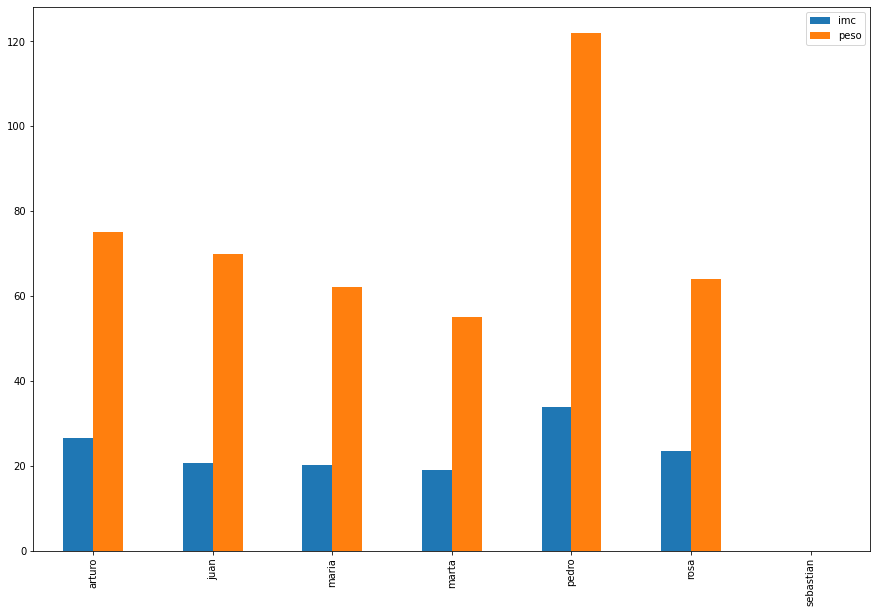

In [68]:
personas[["imc", "peso"]].plot(kind="bar", figsize=(15,10))

<AxesSubplot:xlabel='# year'>

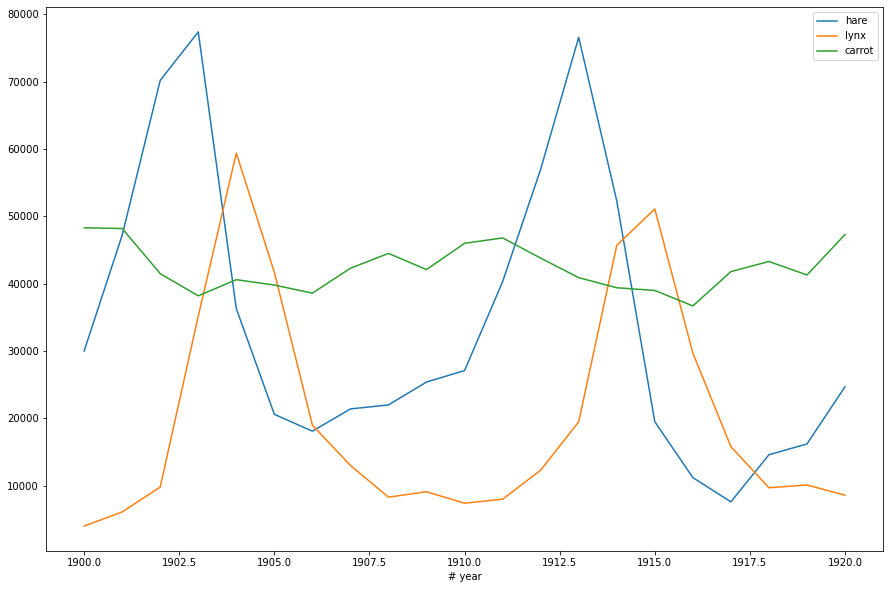

In [69]:
data.plot(figsize=(15,10))

O usando Matplotlib directamente (que nos permitrá más customización)

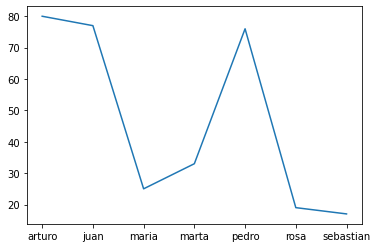

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(personas.index.tolist(), personas['edad'].values)

# Bonus

Hay vida más allá de Numpy y Pandas.

Aquí va una serie de librerías útiles:

#### Computing
* [numba](https://github.com/numba/numba) - see `@jit` decorator
* [pandas profiling](https://docs.profiling.ydata.ai/latest/) - automate report generation
* [polars](https://pola.rs/): alternativa a Pandas
* [DuckDB](https://duckdb.org/): como SQlite pero pensada para hacer ánalisis de datos.  DuckDB stores data in columnar format whereas SQLite is a row store. DuckDB is optimized for queries that apply aggregate calculations across large numbers of rows, whereas SQLite is optimized for fast scanning and lookup for individual rows of data. ([ref](https://marclamberti.com/blog/duckdb-getting-started-for-beginners/)) Básicamente es como Pandas pero más rápido. You can use data sets larger than RAM, but still fit on your hard drive. With pandas, you are limited by RAM.  ([ref](https://www.reddit.com/r/dataengineering/comments/10wd2e0/what_is_the_hype_around_duckdb_that_i_dont_seem/))
* [xarray](https://docs.xarray.dev/) - work better with multidimensional array by labelling dimensions 
* [numexpr](https://github.com/pydata/numexpr) - accelerate Numpy computations
* [intelex](https://intel.github.io/scikit-learn-intelex/) - Intel extension to accelerate sklearn

In [87]:
from numba import jit
import numpy as np

x = np.arange(100).reshape(10, 10)

@jit(nopython=True) # Set "nopython" mode for best performance, equivalent to @njit
def go_fast(a): # Function is compiled to machine code when called the first time
    trace = 0.0
    for i in range(a.shape[0]):   # Numba likes loops
        trace += np.tanh(a[i, i]) # Numba likes NumPy functions
    return a + trace              # Numba likes NumPy broadcasting

print(go_fast(x))


[[  9.  10.  11.  12.  13.  14.  15.  16.  17.  18.]
 [ 19.  20.  21.  22.  23.  24.  25.  26.  27.  28.]
 [ 29.  30.  31.  32.  33.  34.  35.  36.  37.  38.]
 [ 39.  40.  41.  42.  43.  44.  45.  46.  47.  48.]
 [ 49.  50.  51.  52.  53.  54.  55.  56.  57.  58.]
 [ 59.  60.  61.  62.  63.  64.  65.  66.  67.  68.]
 [ 69.  70.  71.  72.  73.  74.  75.  76.  77.  78.]
 [ 79.  80.  81.  82.  83.  84.  85.  86.  87.  88.]
 [ 89.  90.  91.  92.  93.  94.  95.  96.  97.  98.]
 [ 99. 100. 101. 102. 103. 104. 105. 106. 107. 108.]]


#### GPU acceleration
* [pycuda](https://github.com/inducer/pycuda) - GPU
* [triton](https://github.com/openai/triton) – simple high performance GPU programming (openai)

You can use GPU based alternatives of common libraries for faster performance:
* [cudf](https://github.com/rapidsai/cudf) - alternative to Pandas
* [cuml](https://github.com/rapidsai/cuml) - alternative to sklearn
* [cusignal](https://github.com/rapidsai/cusignal) - alternaitve to scipy signal
* [cugraph](https://github.com/rapidsai/cugraph) - for graph algorithms
* [cupatial](https://github.com/rapidsai/cuspatial) - for geospatial operations
* [cuxfilter](https://github.com/rapidsai/cuxfilter) - accelerate visualization (Bokeh, DataShader, Panel, Falcon, Jupyter)

#### Visualization
* [matplotlib](https://github.com/matplotlib/matplotlib)
* [science-plots](https://github.com/garrettj403/SciencePlots) - Matplotlib styles for scientific figures
* [jupyter scatter](https://github.com/flekschas/jupyter-scatter) - useful for visualizing very multidimensional data due to it's [link view feature](https://github.com/flekschas/jupyter-scatter#linking-scatter-plots).
* [voilá](https://github.com/voila-dashboards/voila) - add interactivity to jupyter notebooks
* [mayavi](https://github.com/enthought/mayavi) - 3D plotting
* [pyvista](https://github.com/pyvista/pyvista) - 3D plotting
* [seaborn](https://github.com/mwaskom/seaborn)
* [dash](https://github.com/plotly/dash), [plotly](https://github.com/plotly/plotly.py), [taipy](https://github.com/Avaiga/taipy), streamlit (only prototypes) - create online dashboards
* [bokeh](https://docs.bokeh.org/en/latest/) → better than Dash if one needs to save user state (eg. long claculation) ([ref](https://pauliacomi.com/2020/06/07/plotly-v-bokeh.html))
* [missingno](https://github.com/ResidentMario/missingno) - plot missing data
* [datashader](https://github.com/holoviz/datashader)
* [holoviews](https://github.com/holoviz/holoviews) - Stop plotting your data - annotate your data and let it visualize itself.
* [PIL](https://github.com/python-pillow/Pillow) – image processing
* [celluloid](https://github.com/jwkvam/celluloid/) - easily create animations